# 서포트 벡터 머신
    - 새로운 데이터가 입력되었을때 기존 데이터를 활용해 분류하는 방법
    - 패턴 인식,자료 분석 등을 위한 지도 학습 모델로 회귀와 분류 문제 해결에 사용이 되는 알고리즘

- 매개변수
    - C 
        - 기본값 : 1.0
        - 규제의 강도의 역수
        - 숫자가 크면 -> 오차를 허용하지 않는다. (과적합 위험)
        - 숫자가 작으면 -> 오차를 어느정도 허용 (일반화 위험)
    -kernel (커널 함수의 종류)
        - 기본값 : "rbf"
        - 실제 데이터가 선형이 아닌 경우 커널 함수를 이용하여 데이터를 고차원 데이터로 매핑하여 직선으로 구분을 가능하게 하는 방법
        - "linear" : 선형 SVM
        - "poly" : 다항식 커널
        - "rbf" : 가우시안 커널(가장 많이 사용)
        - "sigmoid" : 시그모이드 함수 기반
    - gamma
        - 커널 계수
        - 'linear' 제외한 커널이 선택되었을때 사용
        - 해당값이 크다면 -> 경계가 복잡해짐 (과적합 위험)
        - 해당값이 작다면 -> 경계가 유연해짐 (일반화 위험)
    - degree
        - 기본값 : 3
        - 다항식 커널의 차수
        - 비선형 데이터의 패턴을 학습할 수 있게 해주는 변수
    - probability
        - 기본값 : False
        - 확률 출력의 여부 -> True인 경우 predict_proba() 함수를 사용 가능
        - 학습할때 속도가 느려짐
- 주요 속성
    - support_
        - 서포트 벡터의 인덱스의 값
        - 전체의 데이터에서 경계선에 딱 붙어 있는 데이터의 인덱스 값
    - support_vectors_
        - supprot_ 위치(인덱스)의 값이라면 그 값에 해당하는 실제 데이터 값
    - n_supprot
        - 클래스(컬럼)별 서포트 벡터의 개수
    coef_
        - 결정 경계의 계수 (linear 커널인 경우에만 사용 가능)
- 매서드
    - fit(x, y) : 학습
    - predict(x) : 예측
    - predict_proba(x) : 예측 확률(probability의 값이 True인 경우)
    - decision_function(x) : 결정 함수의 값(margin과의 거리)
    - score(x, y): 정확도 평가

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [3]:
df = pd.read_csv("../data/classification.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   interest  297 non-null    float64
 2   success   297 non-null    float64
dtypes: float64(3)
memory usage: 7.1 KB


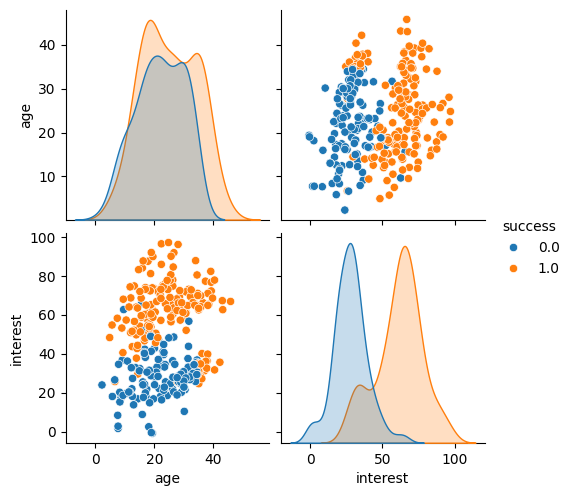

In [5]:
# 데이터에서 클래스 분포를 그래프 확인
sns.pairplot(
    data = df,
    hue = 'success'
)

In [6]:
# 데이터의 분할 train, test
x = df[['age', 'interest']].values
y = df['success'].values

X_train, X_test, Y_train, Y_test = train_test_split(
    x, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

In [7]:
# 스케일러 사용
# SVM은 각각 특성(컬럼)의 스케일에 매우 민감하기 때문에 스케일링 작업이 필요
scaler = StandardScaler()

scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [8]:
# 스케일링이 된 데이터를 기준으로 학습하고 평가
clf = SVC(C=0.5)

In [9]:
clf.fit(X_train_sc, Y_train)

,C,0.5
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [10]:
pred = clf.predict(X_test_sc)

cm = confusion_matrix(Y_test, pred)
acc = accuracy_score(Y_test, pred)
prc = precision_score(Y_test, pred)
rcll = recall_score(Y_test, pred)
f1 = f1_score(Y_test, pred)

print("혼동행렬 :", cm)
print("정확도 :", round(acc, 2))
print("정밀도 :", round(prc, 2))
print("재현율 :", round(rcll, 2))
print("f1 :", round(f1, 2))


혼동행렬 : [[36  3]
 [ 4 47]]
정확도 : 0.92
정밀도 : 0.94
재현율 : 0.92
f1 : 0.93


In [11]:
# 스케일링이 되지 않은 원본의 데이터를 이용하여 학습 평가 지표 출력
clf2 = SVC(C=0.5)
clf2.fit(X_train, Y_train)

pred2 = clf2.predict(X_test)

cm2 = confusion_matrix(Y_test, pred2)
acc2 = accuracy_score(Y_test, pred2)
prc2 = precision_score(Y_test, pred2)
rcll2 = recall_score(Y_test, pred2)
f1_2 = f1_score(Y_test, pred2)

print("혼동행렬 :", cm2)
print("정확도 :", round(acc2, 2))
print("정밀도 :", round(prc2, 2))
print("재현율 :", round(rcll2, 2))
print("f1 :", round(f1_2, 2))

혼동행렬 : [[36  3]
 [ 9 42]]
정확도 : 0.87
정밀도 : 0.93
재현율 : 0.82
f1 : 0.88


In [12]:
# 분류 분석을 통하여 확인
from sklearn.svm import LinearSVC

c -> 1인 경우 support_vector의 개수는 100
c -> 500인 경우 support_vector의 개수는 97


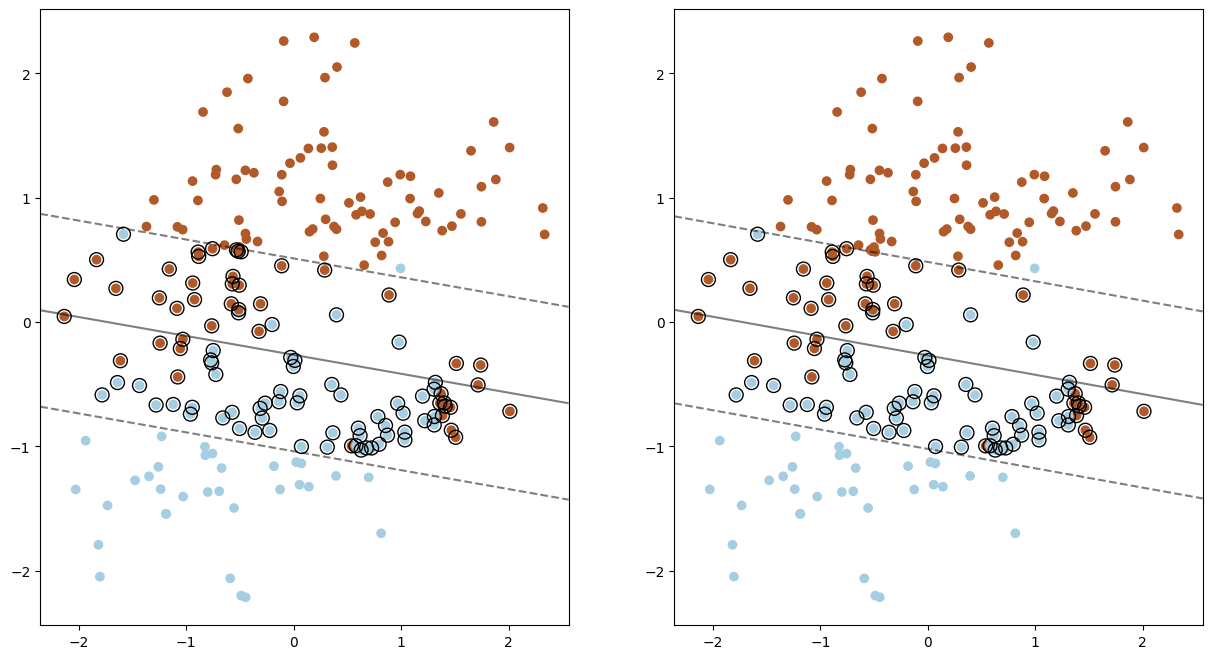

In [13]:
# 마진 영역을 그래프로 표시
plt.figure(figsize=(15, 8))

for i, c in enumerate([1, 500]):
    # i에서는 [1, 500] 리스트의 위치 값이 순차적으로 대입
    # c에는 [1, 500] 리스트의 값들이 순차적으로 대입
    clf = LinearSVC(C = c, random_state=42)
    clf.fit(X_train_sc, Y_train)
    
    # decsision_function() -> 경계선과의 거리를 의미
    decision = clf.decision_function(X_train_sc)
    
    # margin(-1 <= decision_function <= 1) 데이터를 support_vector로 간주
    support_vector_indices = np.where(
        np.abs(decision) <= 1 + 1e-15
    )[0]
    
    support_vector = X_train_sc[support_vector_indices]
    # support_vector의 개수를 출력
    print(f"c -> {c}인 경우 support_vector의 개수는 {len(support_vector)}")
    
    # subplot을 이용하여 1행 2열의 영역을 셍성
    plt.subplot(1, 2, i+1)
    
    # 학습 데이터의 산점도 그래프를 생성
    plt.scatter(X_train_sc[:, 0], X_train_sc[:, 1], c=Y_train, cmap=plt.cm.Paired)
    
    # 현재 좌표축의 정보를 로드
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    
    # 격자(결정 경계) 추가
    xx, yy = np.meshgrid(
        # x축 범위 안에서 50개의 데이터를 새성
        np.linspace(xlim[0], xlim[1], 50),
        # y축 범위 안에서 50개의 데이터를 생성
        np.linspace(ylim[0], ylim[1], 50)
    )
    
    # 각 격자점에 대한 decision_function의 값을 지정하고 행렬의 크기를 xx와 같게 변환
    z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    
    # 등고선을 추가
    # 결정 경계와 margin을 생성
    plt.contour(
        xx, yy, z, colors='k', levels = [-1, 0, 1,], # -> -1, 1은 margins, 0은 결정 경계
        alpha = 0.5, linestyles = ['--', '-', '--']
    )
    
    # support_vector의 데이터를 동그라미 표시
    plt.scatter(
        support_vector[:, 0], support_vector[:, 1], s=100, #크기,
        linewidths=1, facecolors = 'none', edgecolors='k'
    )



plt.show()

# SVR (Support Vetor Regression)
- 서포트 백터 회귀 분석
- 입실론 튜브 안에 들어오는 데이터는 오차로 보지 앟는다.
- 튜브 밖의 데이터만 패널티를 부여하는 방식

- 매개변수
    -kernel
        - 커널 함수 선택
        - linear
            - 사용 매개변수 : C , epsliron
            - 고차원 희소데이터, 선형 데이터셋
        - rbf
            - 사용 매개변수 : C , epsliron, gamma
            - 범용, 성능이 우수
        - poly
            - 사용 매개변수 : C, epsliron, degree, gamma
            - 다항적 경계가 자연스러운 데이터
        - sigmoid
            - 사용 매개변수 : C, esliron, gamma
            - 특수한 경우에 이용, 신경망과 유사 데이터 (연구용 데이터)
    - epsliron : 오차 허용의 폭
    - gamma : 데이터 간 영향의 범위
- 속성
    - dual_coef_ : 쌍대 문제의 회귀 계수 값들
    - coef_ : 회귀계수

In [14]:
# 랜덤 데이터를 생성
x = np.sort(
    5 * np.random.rand(40, 1), axis=0
)
y = np.sin(x).ravel()


print(x, y)

[[0.24011722]
 [0.60432815]
 [0.62409145]
 [1.10073474]
 [1.15945279]
 [1.2108532 ]
 [1.29179392]
 [1.33673775]
 [1.48100543]
 [1.62370309]
 [1.71272867]
 [1.78754067]
 [1.83064699]
 [1.9437672 ]
 [2.15519584]
 [2.34745943]
 [2.51252234]
 [2.75848046]
 [2.77774779]
 [2.81986768]
 [2.89575955]
 [2.93178098]
 [2.93402832]
 [3.08966359]
 [3.12489739]
 [3.16005663]
 [3.21081202]
 [3.30157733]
 [3.33990732]
 [3.43868713]
 [3.60945355]
 [3.81910594]
 [4.00618157]
 [4.03427527]
 [4.09387107]
 [4.15991893]
 [4.26236155]
 [4.50435082]
 [4.9127325 ]
 [4.96287982]] [ 0.23781649  0.56820935  0.58436023  0.89154039  0.91658445  0.93591686
  0.96133065  0.97273311  0.99597151  0.99860076  0.9899445   0.97660276
  0.96642836  0.93124892  0.83404352  0.71325635  0.58839329  0.37380885
  0.35587002  0.3162035   0.24336447  0.2082757   0.20607713  0.05190573
  0.01669449 -0.01846293 -0.0691641  -0.15930307 -0.19701731 -0.29274321
 -0.45097809 -0.62685748 -0.76082856 -0.77875742 -0.81473871 -0.85123086
 

In [15]:
# 타깃 데이터(종속 변수에 노이즈 추가)
y[::5] += 3*(0.5-np.random.rand(8))

print(y[:10])

[1.03128054 0.56820935 0.58436023 0.89154039 0.91658445 1.30959229
 0.96133065 0.97273311 0.99597151 0.99860076]


In [16]:
# 회귀 모델에 (rbf, 선형, 다형)
from sklearn.svm import SVR

In [17]:
svr_rbf = SVR(kernel='rbf', C = 100, gamma=0.1, epsilon=0.1)
svr_linear = SVR(kernel='linear', C = 100, gamma='auto', epsilon=0.1)
svr_poly = SVR(kernel='poly', C = 100, degree =3, gamma='auto', epsilon=0.1, coef0=1)


In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [19]:
# 학습
svr_rbf.fit(x, y)
svr_linear.fit(x, y)
svr_poly.fit(x, y)

,kernel,'poly'
,degree,3
,gamma,'auto'
,coef0,1
,tol,0.001
,C,100
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [20]:
# 예측 데이터 생성
pred_rbf = svr_rbf.predict(x)
pred_linear = svr_linear.predict(x)
pred_poly = svr_poly.predict(x)

In [21]:
#평가 지표를 데이터프레임으로 생성
index = ['RBF', 'Lin', 'Poly']
cols = ['MSE', 'RMSE', "MAE", 'R2']

result = pd.DataFrame(index = index, columns=cols)
result

,MSE,RMSE,MAE,R2
RBF,NaN,NaN,NaN,NaN
Lin,NaN,NaN,NaN,NaN
Poly,NaN,NaN,NaN,NaN


In [22]:
# 예측 값들을 리스트로 생성
preds = [pred_rbf, pred_linear, pred_poly]

for pred, i in zip(preds, index):
    # pred -> 예측값들 -> 타입이 1차원 배열
    # i -> kernel의 값
    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, pred)
    
    result.loc[i, 'MSE'] = mse
    result.loc[i, 'RMSE'] = rmse
    result.loc[i, 'MAE'] = mae
    result.loc[i, 'R2'] = r2

In [23]:
result

,MSE,RMSE,MAE,R2
RBF,0.099701,0.315754,0.172679,0.839651
Lin,0.186058,0.431344,0.285565,0.700762
Poly,0.118115,0.343679,0.17912,0.810035


# 연습
- csv 폴더 안에 boston 데이터를 로드
- 독립, 종속 변수로 데이터를 나눠준다.
- train, test를 8:2의 비율로 분할
- RBF, Lin, Poly 모델을 생성
- train 데이터를 학습
- test 데이터를 이용하여 예측
- 각각 모델의 평가 지표를 생성하여 우수한 kernel 함수를 선택

In [27]:
df = pd.read_csv("../csv/boston.csv")

In [29]:
len(df)

506

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df.drop('Price', axis=1).values,
    df['Price'],
    test_size=0.2,
    random_state=42
)

In [ ]:
# boston 데이터를 이용하여 SVR의 RBF, Lin, Poly 모델 중 어떤 것이 성능이 가장 높은가? 확인
svr_rbf2 = SVR(kernel='rbf', C = 100, gamma=0.1, epsilon=0.1)
svr_linear2 = SVR(kernel='linear', C = 100, gamma='auto', epsilon=0.1)
svr_poly2 = SVR(kernel='poly', C = 100, degree =3, gamma='auto', epsilon=0.1, coef0=1)

svr_rbf2.fit(X_train, Y_train)
svr_linear2.fit(X_train, Y_train)
svr_poly2.fit(X_train, Y_train)

In [ ]:
pred_rbf2 = svr_rbf2.predict(X_test)
pred_linear2 = svr_linear2.predict(X_test)
pred_poly2 = svr_poly2.predict(X_test)

In [ ]:
index2 = ['RBF', 'Lin', 'Poly']
cols2 = ['MSE', 'RMSE', "MAE", 'R2']

result2 = pd.DataFrame(index = index2, columns=cols2)

In [ ]:
preds2 = [pred_rbf2, pred_linear2, pred_poly2]

for pred, i in zip(preds2, index2):
    # pred -> 예측값들 -> 타입이 1차원 배열
    # i -> kernel의 값
    mse2 = mean_squared_error(Y_test, pred)
    mae2 = mean_absolute_error(Y_test, pred)
    rmse2 = np.sqrt(mse2)
    r2_2 = r2_score(Y_test, pred)
    
    result2.loc[i, 'MSE'] = mse2
    result2.loc[i, 'RMSE'] = rmse2
    result2.loc[i, 'MAE'] = mae2
    result2.loc[i, 'R2'] = r2_2

In [ ]:
result2